# Pymaceuticals Inc.
---

### Analysis
This data is from a screening for 'potential treatments for squamous cell carcinoma (SCC), a commonly occurring form of skin cancer. 249 mice who were identified with SCC tumors received treatment with a range of drug regimens. Over the course of 45 days, tumor development was observed and measured. The purpose of this study was to compare the performance of Pymaceuticals’ drug of interest, Capomulin, against the other treatment regimens.'

Key Findings from analysis
* Ramicane and Capomulin had the greatest effect on the Overall Tumor size. In other drug regimens, tumor size continued to increase.
* Equal ratio of male and female mice were tested.
* More mice were tested with Ramicane and Capomulin and a placebo was used.
* Mouse age varied between 1 and 24 months.
* Mice tested with Capomulin had an increase in tumor size prior to reduction of size.
* As tumor volume increased, the weight of the mouse increased.





In [1]:
#!pip matplotlib

In [35]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sns
from scipy.stats import linregress


In [3]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

mouse_metadata_df = pd.DataFrame(mouse_metadata)
study_results_df = pd.DataFrame(study_results)
#study_results_df.head()

In [4]:
#Look at columns to find where to merge
print(mouse_metadata.columns)
print(study_results.columns)


Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'], dtype='object')
Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'], dtype='object')


In [5]:
# Combine the data into a single dataset
mouse_study_df = pd.merge(study_results_df, mouse_metadata_df, on=['Mouse ID'])
#copy_mouse_study = mouse_study_df
mouse_study_df['Drug Regimen'].sort_values()
mouse_study_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [6]:
mouse_study_df.count()
#mouse_study_df.describe()

Mouse ID              1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
dtype: int64

In [7]:
#Display the number of unique mice IDs in the data, and then check for any mouse ID with duplicate time points.
number_of_mice = len(mouse_study_df['Mouse ID'].unique())
print(number_of_mice)


249


In [8]:
#Optional: Get all teh data for the duplicate mouse ID
mouse_study_df2 = mouse_study_df[mouse_study_df.duplicated(['Mouse ID',"Timepoint"])]


In [9]:
#Duplicated Mouse ID dataframe
mouse_study_df2.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [10]:
mouse_study_df = mouse_study_df[mouse_study_df["Mouse ID"]!='g989'].copy()
mouse_study_df.head()
#print(mouse_study_df2["Timepoint"].describe())

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [11]:
#check to evaluate the numbers are the same.
#print(mouse_study_df['Mouse ID'].duplicated().sum())
#print(mouse_study_df2['Mouse ID'].duplicated().sum())

In [12]:
number_of_mice = len(mouse_study_df['Mouse ID'].unique())
print(number_of_mice)

#mouse_study_df2[["Sex"]].describe()
#mouse_study_df2[["Mouse ID"]].describe()
#mouse_study_df2[["Drug Regimen"]].describe()

248


In [13]:
#drop the duplicates
mouse_study_clean_df = mouse_study_df.copy()
mouse_study_clean_df.head(100)
# mouse_study_clean_df = mouse_study_df.drop_duplicates("Mouse ID", keep="first",inplace=False)
# mouse_study_clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
95,x930,25,53.726101,0,Naftisol,Male,13,26
96,o725,0,45.000000,0,Naftisol,Male,4,26
97,o725,5,46.889821,0,Naftisol,Male,4,26
98,o725,10,48.199452,0,Naftisol,Male,4,26


In [14]:
mouse_study_clean_df.count()


Mouse ID              1880
Timepoint             1880
Tumor Volume (mm3)    1880
Metastatic Sites      1880
Drug Regimen          1880
Sex                   1880
Age_months            1880
Weight (g)            1880
dtype: int64

### Summary Statistics


In [15]:
#mouse_study_df[["Tumor Volume (mm3)"]].describe()

In [16]:
#Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mouse_study_stats_df = pd.DataFrame()
mouse_study_stats_df.sort_index(axis=1,ascending=True)

#Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
#drug_regimen = mouse_study_df2.groupby(['Drug Regimen'])
mean_tumor_regimen = mouse_study_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median_tumor_volume = mouse_study_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
tumor_volume__stddev = mouse_study_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
tumor_volume_stderr = mouse_study_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()

#print(drug_regimen)
#mouse_study_stats_df['Drug Regimen'] = [drug_regimen]
mouse_study_stats_df['Mean Tumor Volume(mm3)'] = mean_tumor_regimen
mouse_study_stats_df['Median Tumor Volume(mm3)'] = median_tumor_volume
mouse_study_stats_df['Tumor Volume(mm3) Std. Dev.'] = tumor_volume__stddev
mouse_study_stats_df['Tumor Volume(mm3) Std. Err'] = tumor_volume_stderr

#Assemble the resulting series into a single summary DataFrame.

mouse_study_stats_df.head(20)
#mean_tumor_regimen

,Mean Tumor Volume(mm3),Median Tumor Volume(mm3),Tumor Volume(mm3) Std. Dev.,Tumor Volume(mm3) Std. Err
Drug Regimen,,,,
Capomulin,40.675741,41.557809,4.994774,0.329346
Ceftamin,52.591172,51.776157,6.268188,0.469821
Infubinol,52.884795,51.820584,6.567243,0.492236
Ketapril,55.235638,53.698743,8.279709,0.603860
Naftisol,54.331565,52.509285,8.134708,0.596466
Placebo,54.033581,52.288934,7.821003,0.581331
Propriva,52.320930,50.446266,6.622085,0.544332
Ramicane,40.216745,40.673236,4.846308,0.320955
Stelasyn,54.233149,52.431737,7.710419,0.573111


In [17]:
mouse_study_grouped_single = mouse_study_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean', 'median', 'std','sem']})
mouse_study_grouped_single.head()


Tumor Volume (mm3)                               
                           mean     median       std       sem
Drug Regimen                                                  
Capomulin             40.675741  41.557809  4.994774  0.329346
Ceftamin              52.591172  51.776157  6.268188  0.469821
Infubinol             52.884795  51.820584  6.567243  0.492236
Ketapril              55.235638  53.698743  8.279709  0.603860
Naftisol              54.331565  52.509285  8.134708  0.596466

### Bar and Pie Charts


Text(0, 0.5, 'Number of Mice Tested')

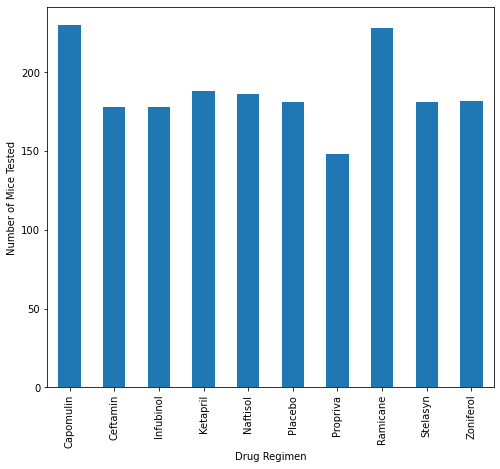

In [18]:
#Create the first bar chart with the Pandas DataFrame.plot() method
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepoints = mouse_study_df.groupby(['Drug Regimen'])['Timepoint'].count()

timepoint_chart = timepoints.plot(kind='bar',figsize=(8,7))
timepoint_chart.set_xlabel("Drug Regimen")
timepoint_chart.set_ylabel('Number of Mice Tested')


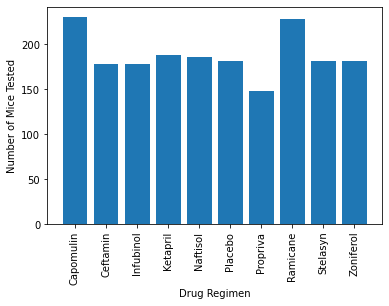

In [19]:
#Create the second bar chart with Matplotlib's pyplot methods.
#plt.bar(timepoints)
#print(type(timepoints))
x = timepoints.index.get_level_values(0)
y = np.array(timepoints)
#print(y)

plt.bar(x,y,align='center')
plt.xticks(rotation=90)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')
plt.show()


# Pie Chart- 

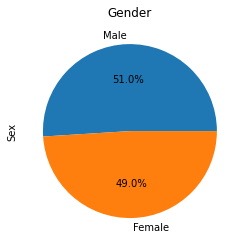

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Creating plot Using Pandas

#labels = ["Male", "Female"]
gender_data = (mouse_study_df["Sex"].value_counts()/len(mouse_study_df)*100)
gender_data = gender_data.round(0)

# creating dataframe
gender = gender_data.plot(kind='pie',autopct='%.1f%%',labels=["Male", "Female"],title='Gender')
plt.show()

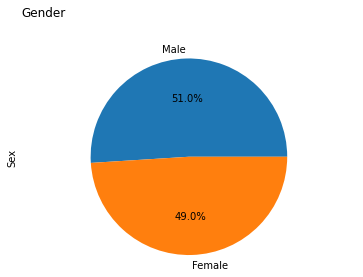

In [21]:
#Pie Chart using Matplotlib

# Creating dataset
gender = ['Male', 'Female']
#x= gender_data.index.get_level_values(0)
 
y = np.array(gender_data)

# Creating plot
plt.pie(y, labels=gender, autopct='%1.1f%%')
plt.title('Gender',pad=32,loc='left')
plt.ylabel('Sex')
plt.axis('equal')
plt.show()

### Quartiles, Outliers, and Boxplots

In [22]:
#Calculate the final tumor volume of each mouse across four of the Drug Regimens

# Put treatments into a list for for loop (and later for plot labels)
drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

#drug_tumorvol_df= pd.DataFrame()
df = mouse_study_df[mouse_study_df["Drug Regimen"].isin(drugs)]
df = df.drop(columns = ['Metastatic Sites','Sex','Age_months'])
df = df.set_index('Drug Regimen')

# # Start by getting the last (greatest) timepoint for each mouse.
max_timepoint = df['Timepoint']
#print(max_timepoint.max())

max_timepoint_df = df.groupby('Mouse ID')[['Timepoint']].max()
max_timepoint_df

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
#capture only the records which have the max timepoint for each Mouse ID
merge_df = pd.merge(mouse_study_df, max_timepoint_df, on=['Mouse ID','Timepoint'],how='right')
merge_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
95,y769,45,68.594745,4,Ceftamin,Female,6,27
96,y793,45,31.896238,2,Capomulin,Male,17,17
97,y865,45,64.729837,3,Ceftamin,Male,23,26
98,z578,45,30.638696,0,Ramicane,Male,11,16


In [23]:
df2 = merge_df[['Drug Regimen','Tumor Volume (mm3)']].copy()
df2 = df2.sort_values(['Drug Regimen'],ascending = [True])
df2 = df2.set_index("Drug Regimen")
df2

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,38.846876
Capomulin,38.125164
Capomulin,38.753265
Capomulin,31.023923
Capomulin,40.159220
...,...
Ramicane,31.560470
Ramicane,36.134852
Ramicane,22.050126


In [24]:
#Practice
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
#calculate interquartile range from a list
#q3_l, q1_l = np.percentile(tumor_volume_data, [75 ,25])
#iqr_l = q3_l - q1_l
#print(iqr_l)

In [25]:
# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data =[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for d in drugs:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    temp_df = df2.loc[d]
    tumor_volume_data.append(temp_df.values)
    # Determine outliers using upper and lower bounds
    q75, q25 = np.percentile(temp_df['Tumor Volume (mm3)'], [.75 ,.25])
    iqr = q75 - q25
    #OUTLIERS #UPPERBOUN
    ub = q75 + (1.5 * iqr)
    #OUTLIERS lowerboud
    lb = q25 - (1.5 * iqr)
    outliers = temp_df.loc[(temp_df['Tumor Volume (mm3)']<lb) | (temp_df['Tumor Volume (mm3)']>ub)]
    print(f'Outliers: {outliers} Upper bound: {ub}, Lower Bound: {lb}\n')
    
#Determine outliers by using the upper and lower bounds, and then print the results.
#https://medium.datadriveninvestor.com/finding-outliers-in-dataset-using-python-efc3fce6ce32

#print(df2['Drug Regimen']== 'Infubinol')
#df2.describe()
#Infubinol's potential outliers: 31    36.321346

Outliers:               Tumor Volume (mm3)
Drug Regimen                    
Capomulin              38.846876
Capomulin              38.125164
Capomulin              38.753265
Capomulin              31.023923
Capomulin              40.159220
Capomulin              37.074024
Capomulin              30.485985
Capomulin              34.455298
Capomulin              40.728578
Capomulin              40.658124
Capomulin              39.952347
Capomulin              47.685963
Capomulin              36.041047
Capomulin              37.311846
Capomulin              32.377357
Capomulin              38.939633
Capomulin              33.329098
Capomulin              31.896238
Capomulin              38.982878
Capomulin              28.484033
Capomulin              41.581521
Capomulin              41.483008
Capomulin              28.430964
Capomulin              46.539206 Upper bound: 25.175049716399997, Lower Bound: 22.7331139212

Outliers:               Tumor Volume (mm3)
Drug Regimen                

In [26]:
#Create a list that holds the treatment names as well as a second, empty list to hold the tumor volume data.

treatment_names = drugs
#print(tumor_volume_data)
#print(drugs)



Use Matplotlib, generate a box plot that shows the distribution of the final tumor volume for all the mice in each treatment group. Highlight any potential outliers in the plot by changing their color and style.

[Text(0.5, 0, 'Drug Regimen'),
 Text(0, 0.5, 'Tumor Volume(mms)'),
 Text(0.5, 1.0, 'Final Tumor Volume of each Mouse ')]

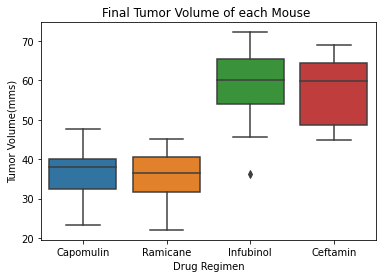

In [27]:
#drug_regimen = temp_df.index.tolist()
#print(drug_regimen)
all_array = [tumor_volume_data[0],tumor_volume_data[1],tumor_volume_data[2],tumor_volume_data[3]]

ax = sns.boxplot(data=all_array)
#ax = sns.boxplot(x="Drug Regimen", y='Tumor Volume (mm3)',data=temp_df)
#ax = sns.boxplot(df2)
#used seaborn module instead of matplotlib
ax.set_xticklabels(['Capomulin','Ramicane','Infubinol','Ceftamin'])
ax.set(xlabel='Drug Regimen',
       ylabel='Tumor Volume(mms)',
       title='Final Tumor Volume of each Mouse ')


### Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

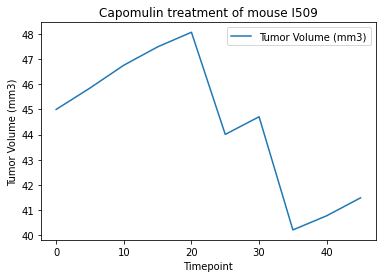

In [28]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
df_timepoint = mouse_study_df[['Mouse ID','Drug Regimen','Tumor Volume (mm3)','Timepoint']].copy()
#df_timepoint = df_timepoint.loc[df_timepoint['Drug Regimen'] =='Capomulin']
df_timepoint = df_timepoint.loc[df_timepoint['Mouse ID'] =='l509']


df_timepoint.plot.line(x='Timepoint', y='Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse I509')
plt.ylabel('Tumor Volume (mm3)')

In [29]:
all_timepoint = mouse_study_df[['Mouse ID','Drug Regimen','Tumor Volume (mm3)','Timepoint']].copy()
#all_timepoint

Text(0.5, 1.0, 'Treatment of mouse')

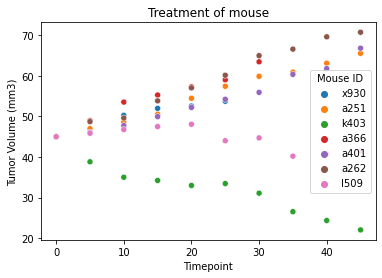

In [30]:
all_timepoint = mouse_study_df[['Mouse ID','Drug Regimen','Tumor Volume (mm3)','Timepoint']].copy()
all_timepoint = all_timepoint.loc[all_timepoint['Mouse ID'].isin(['l509','x930',"k403","a251","a262","a366","a401"])]
all_timepoint.head(20)

all = sns.scatterplot(data=all_timepoint,x='Timepoint', y='Tumor Volume (mm3)',hue='Mouse ID')
#all_timepoint.plot.line(x='Timepoint', y='Tumor Volume (mm3)',legend=True)
all.set_title('Treatment of mouse')
#plt.ylabel('Tumor Volume (mm3)')

In [31]:
#Group by Capomulin not all drugs

df3 = merge_df[['Drug Regimen','Tumor Volume (mm3)','Weight (g)']].copy()
#df3 = df3.sort_values(['Drug Regimen'],ascending = [True])
df4 = df3.loc[df3['Drug Regimen'] =='Capomulin']


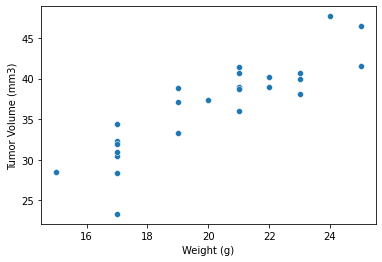

In [32]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


weight_ax1 = sns.scatterplot(data=df4, x='Weight (g)',y='Tumor Volume (mm3)')


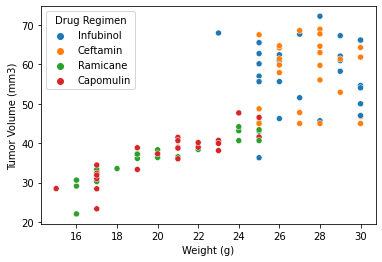

In [33]:
all_weight_ax1 = sns.scatterplot(data=df3, x='Weight (g)',y='Tumor Volume (mm3)',hue='Drug Regimen')

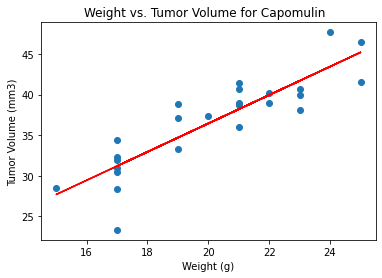

The r-value is: 0.8767060403658119.
The rsquared-value is: 77%.


In [45]:
#Correlation and Regression calculated for mouse weight and average tumour volume for the Capomulin regimen.
mouse_weight = df4['Weight (g)']
average_tumor = df4['Tumor Volume (mm3)']

x_values = mouse_weight
y_values = average_tumor
slope, intercept, r, p, se = linregress(x_values, y_values)
#print(slope,intercept, r, p, se )

regress_values = x_values * slope + intercept
#print(regress_values)
line_eq = f'y = {str(round(slope,2))} x + {str(round(intercept,2))}'

#return line_eq
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
#plt.annotate(line_eq,(x_,y_),fontsize=15,color='red')
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title(f'Weight vs. Tumor Volume for Capomulin  ')
plt.show()
print(f'The r-value is: {r}.')
print(f'The rsquared-value is: {round((r*r)*100)}%.')